In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Get data
pwd = os.getcwd()
head, tail = os.path.split(pwd)
listing_data = os.path.join(head, "data/raw/bkk_listings.csv")
df = pd.read_csv(listing_data)

In [3]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1665.0,15,65,2024-09-17,0.41,1,362,1,NaN
1,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# looking at columns - listing important columns for pricing suggestion based on neighbourhood

imp_cols = [
    "neighbourhood",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_ltm",
]


In [6]:
df_filt = df[imp_cols]

#### NULL Handling


In [7]:
df_filt.isna().sum()

neighbourhood                        0
room_type                            0
price                             5390
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9466
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
df_filt = df_filt.drop(df_filt[df_filt["price"].isna()].index)

In [9]:
df_filt.isna().sum()

neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6678
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [16]:
avg_price = df_filt.groupby(by="neighbourhood", as_index=False)["price"].mean().round(2)

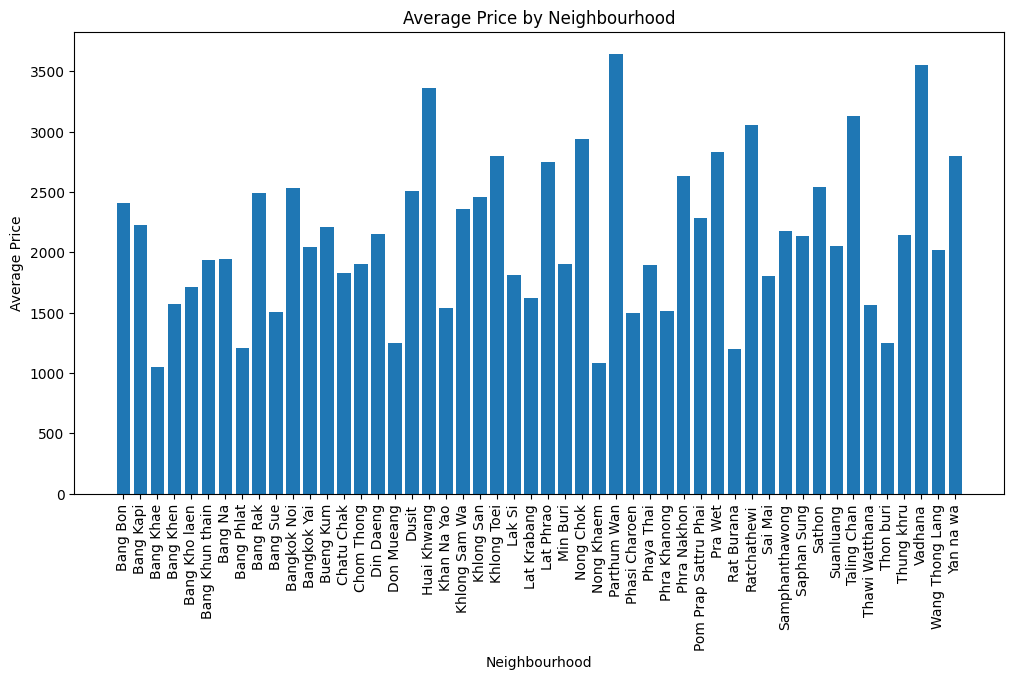

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(avg_price.neighbourhood, avg_price.price)
plt.xticks(rotation=90)  # Rotate labels if many neighbourhoods
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.title("Average Price by Neighbourhood")
plt.show()

Creating funtions to host
